In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
dataset = pd.read_csv('/content/drive/MyDrive/Semester 7 writings/Zameen Property Data.csv')

In [31]:
# dataset = pd.read_csv('dataset/Zameen Property Data.csv')

from pre_poccess import pre_poccess
data = pre_poccess(dataset)
pp_data = data.copy()

145742


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/content/pre_poccess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

date done
145618
pre-poccessed successfully.


# Exploratory Data Analysis

In [ ]:
pp_data.shape

(145618, 16)

In [ ]:
pp_data.dtypes

property_type              object
price                       int64
location                   object
city                       object
province_name              object
latitude                  float64
longitude                 float64
baths                       int64
area                      float64
purpose                    object
bedrooms                    int64
date_added         datetime64[ns]
agency                     object
unique_location            object
price_per_area            float64
price_z_score             float64
dtype: object

In [ ]:
pp_data.nunique()

property_type         7
price              1932
location           1473
city                  5
province_name         3
latitude           7440
longitude          7896
baths                16
area                322
purpose               2
bedrooms             22
date_added          124
agency             5461
unique_location    1553
price_per_area     8970
price_z_score      9010
dtype: int64

In [ ]:
pp_data.describe()

,price,latitude,longitude,baths,area,bedrooms,price_per_area,price_z_score
count,1.456180e+05,145618.000000,145618.000000,145618.000000,1.456180e+05,145618.000000,145618.000000,145618.000000
mean,1.820751e+07,29.711086,71.167552,3.312152,3.577514e+02,3.674099,67399.026487,-0.009370
std,3.394787e+07,3.828329,3.191802,2.355115,1.245425e+04,1.634092,60014.832539,0.267213
min,1.000000e+00,11.052446,25.906027,0.000000,5.000000e+00,1.000000,0.002000,-0.509490
25%,3.200000e+05,24.938913,67.129082,2.000000,1.200000e+02,3.000000,685.714286,-0.169970
50%,9.000000e+06,31.455465,73.047581,3.000000,1.900000e+02,3.000000,66221.428571,-0.066439
75%,2.000000e+07,33.550869,74.187183,5.000000,3.000000e+02,5.000000,96000.000000,0.067359
max,2.000000e+09,73.184088,80.161430,403.000000,3.111100e+06,68.000000,760000.000000,2.975219


In [ ]:
pp_data.isna().sum()

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64

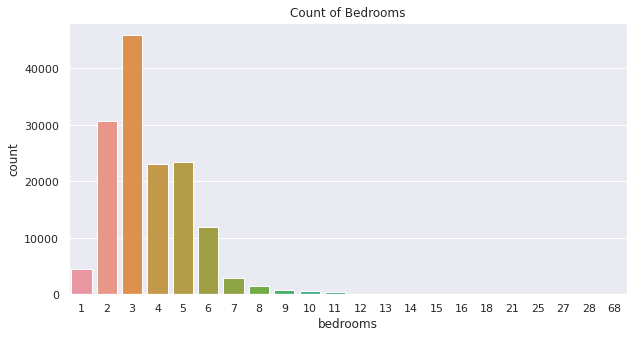

In [55]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="bedrooms", data=pp_data).set_title('Count of Bedrooms')
plt.show()

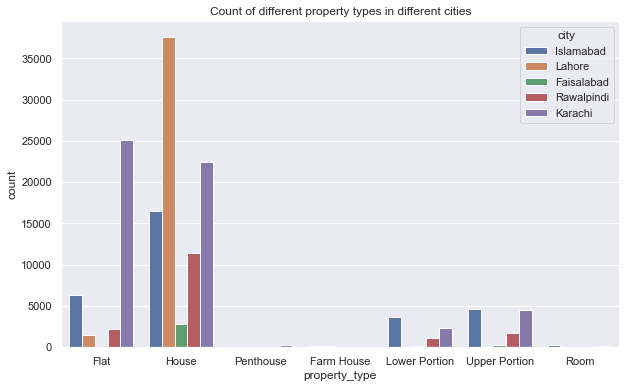

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='property_type',data=pp_data,ax=ax,hue='city').set_title('Count of different property types in different cities')
plt.show()

In [ ]:
cities = pp_data.city.unique().tolist()
for i in cities:
    print("Numer of houses ads for " + i+ " city:",len(pp_data[pp_data['city']==i].index))

Numer of houses ads for Islamabad city: 31651
Numer of houses ads for Lahore city: 39425
Numer of houses ads for Faisalabad city: 3223
Numer of houses ads for Rawalpindi city: 16503
Numer of houses ads for Karachi city: 54816


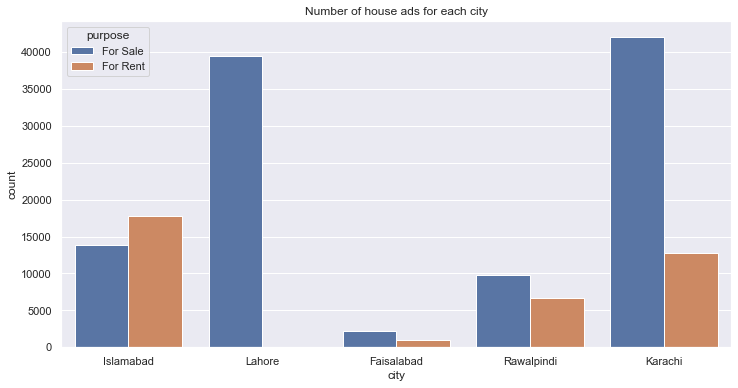

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="city", data=pp_data,hue='purpose').set_title('Number of house ads for each city')
plt.show()

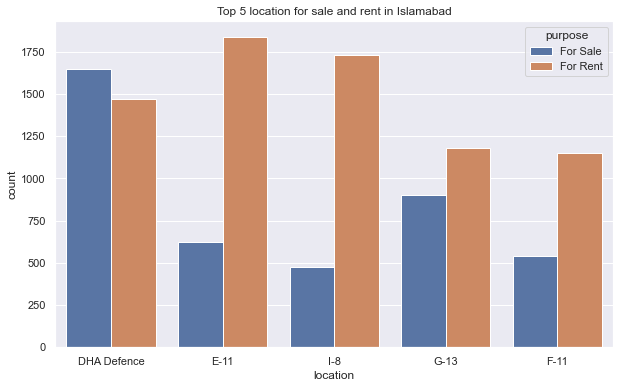

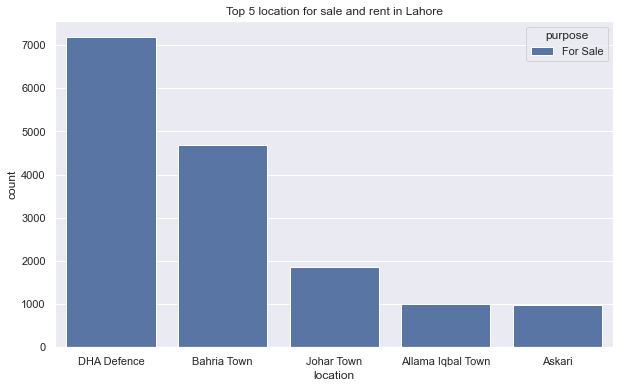

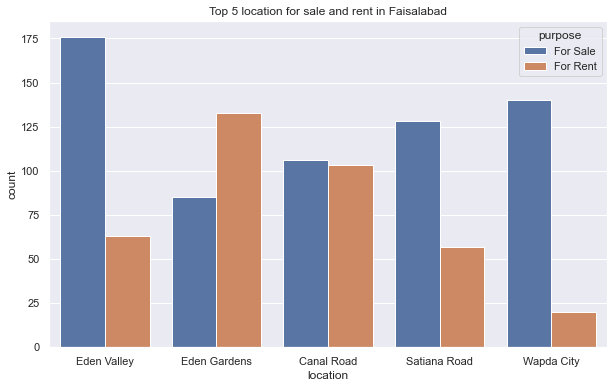

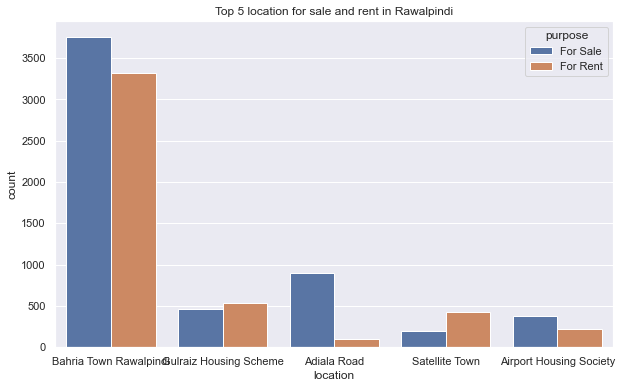

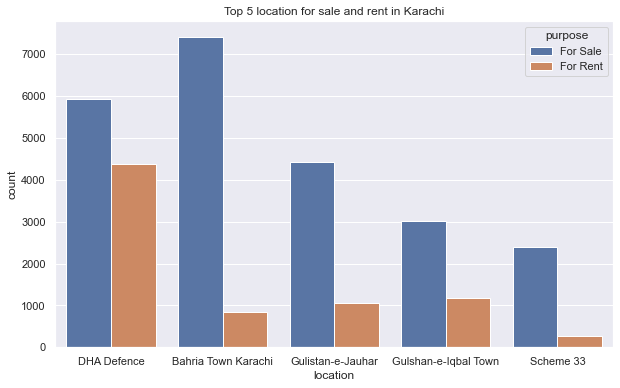

In [ ]:
for i in cities:
    fig, ax = plt.subplots(figsize=(10,6))
    city_data = pp_data[pp_data['city']==i]
    sns.countplot(x='location',data=city_data,ax=ax,order=city_data.location.value_counts().iloc[:5].index,hue="purpose")
    plt.title("Top 5 location for sale and rent in "+i)
    plt.show()

In [ ]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

print("Average Sales price for all countries in Rupees: ",int(for_sale.price.mean()))
print("Average Rent price for all countries in Rupees: ",int(for_rent.price.mean()))

Average Sales price for all countries in Rupees:  24636649
Average Rent price for all countries in Rupees:  93488


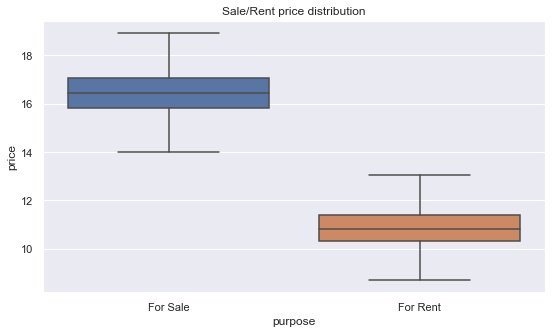

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax,showfliers=False).set_title('Sale/Rent price distribution')
plt.show()

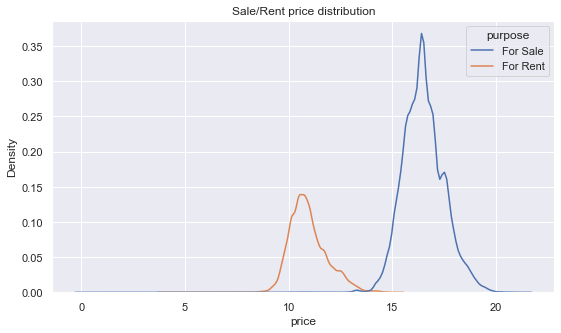

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.kdeplot(x=np.log(pp_data.price),hue=pp_data.purpose,ax=ax)
plt.title('Sale/Rent price distribution')
plt.show()

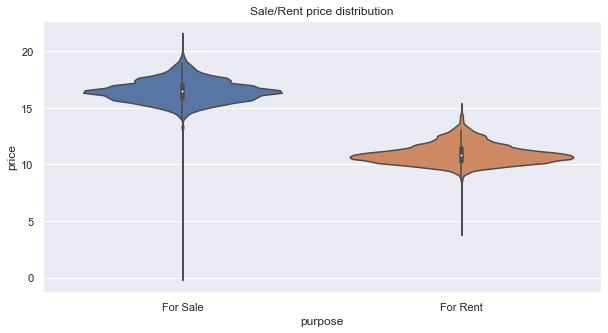

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax).set_title('Sale/Rent price distribution')
plt.show()

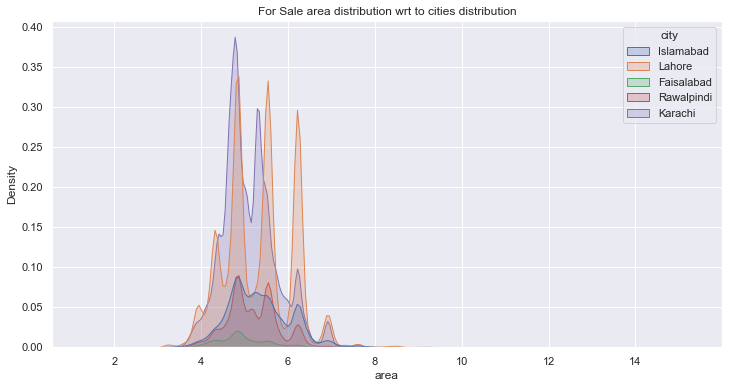

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),ax=ax,hue=for_sale.city,shade=True)
plt.title('For Sale area distribution wrt to cities distribution')
plt.show()

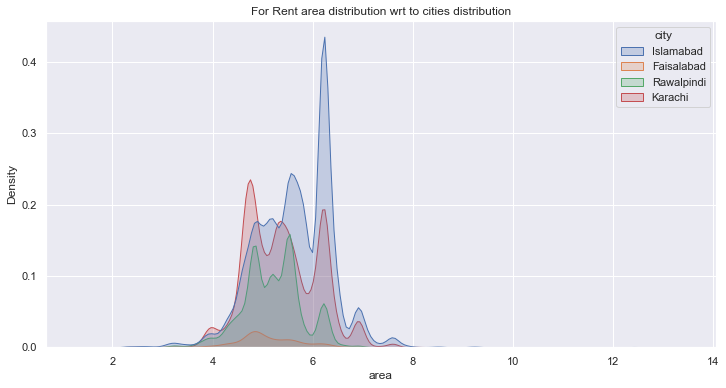

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),ax=ax,hue=for_rent.city,shade=True)
plt.title('For Rent area distribution wrt to cities distribution')
plt.show()

In [ ]:
for i in cities:
    print("Average Sale Price for " +i+ " city: ",for_sale[for_sale['city'] == i].price.mean())

Average Sale Price for Islamabad city:  30050306.7273055
Average Sale Price for Lahore city:  24567814.027875714
Average Sale Price for Faisalabad city:  13781588.499550764
Average Sale Price for Rawalpindi city:  15354048.929448787
Average Sale Price for Karachi city:  25663633.343427867


In [ ]:
for i in cities:
    print("Average Rent Price for " +i+ " city: ",for_rent[for_rent['city'] == i].price.mean())

Average Rent Price for Islamabad city:  109771.49836913733
Average Rent Price for Lahore city:  nan
Average Rent Price for Faisalabad city:  44079.31795386159
Average Rent Price for Rawalpindi city:  42902.690920024055
Average Rent Price for Karachi city:  101055.5450684285


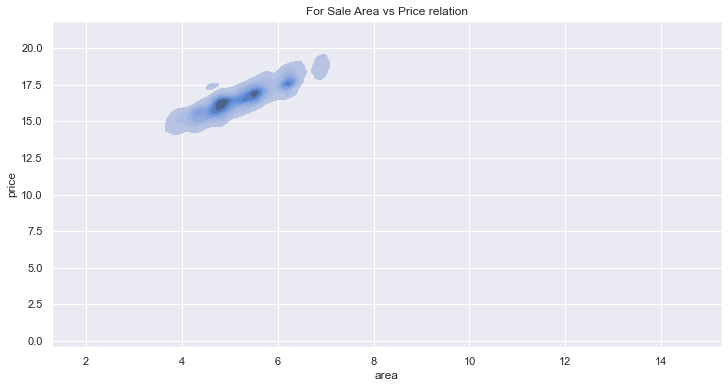

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),y=np.log(for_sale.price),ax=ax,shade=True)
plt.title('For Sale Area vs Price relation')
plt.show()

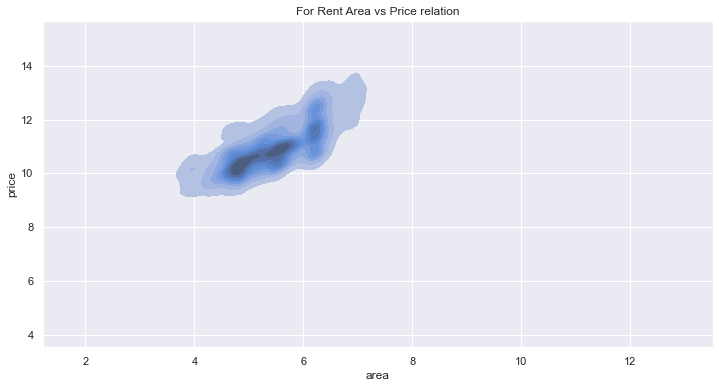

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),y=np.log(for_rent.price),ax=ax,shade=True)
plt.title('For Rent Area vs Price relation')
plt.show()

In [ ]:
print("Number of entries per year:")
pp_data['date_added'].dt.year.value_counts()

Number of entries per year:


2019    134585
2018     11033
Name: date_added, dtype: int64

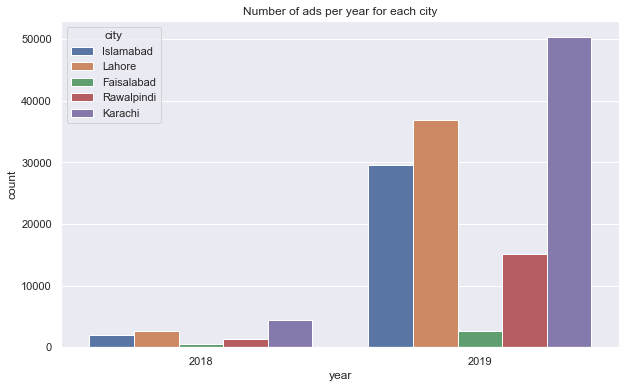

In [ ]:
pp_data['year'] = pp_data['date_added'].dt.year
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="year", data=pp_data,hue="city").set_title('Number of ads per year for each city')
plt.show()

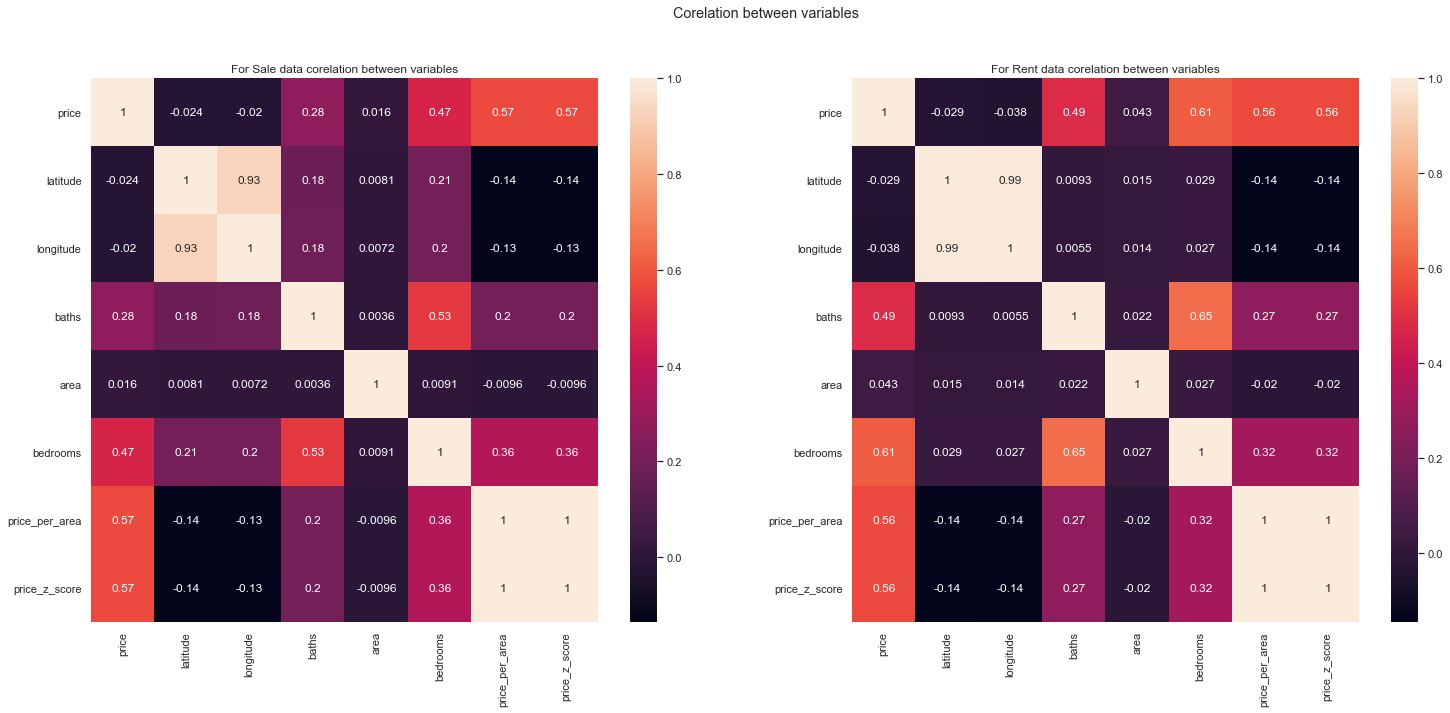

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,10))
sns.heatmap(for_sale.corr(),annot=True,ax=ax1).set_title('For Sale data corelation between variables')
sns.heatmap(for_rent.corr(),annot=True,ax=ax2).set_title('For Rent data corelation between variables')
plt.suptitle('Corelation between variables')
plt.show()

# Questions and Analysis

In [15]:
pp_data = pp_data.drop(pp_data[(pp_data['property_type'] == "Room") | (pp_data['property_type'] == "Penthouse") |  (pp_data['property_type'] == "Farm House")].index)
pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Q1) Difference in property type across sale and rent

### Ad posted for different property types and purposes

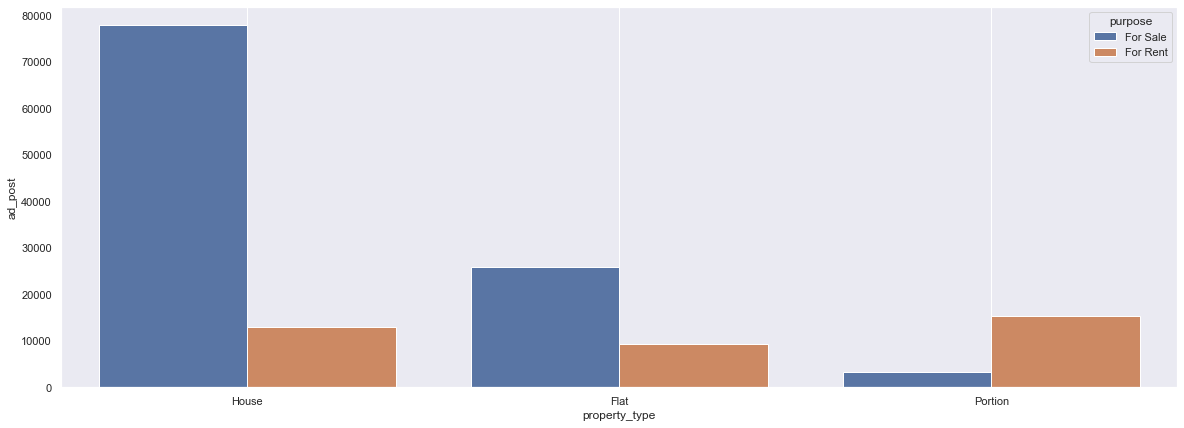

In [ ]:
relevant_data = pp_data[['province_name', 'price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added', 'area']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot = sns.barplot(x = 'property_type', y = 'ad_post', hue = 'purpose', estimator = np.sum, data = relevant_data, ax = ax)
#plot.set(yscale = 'log')
plt.grid()
plt.show()

In [ ]:
print(relevant_data.head(2))

      province_name     price  price_per_area    city   purpose property_type  \
12808        Punjab  26000000   104000.000000  Lahore  For Sale         House   
12135        Punjab  46500000    66428.571429  Lahore  For Sale         House   

      date_added   area  month  year       date  ad_post  
12808 2018-08-05  250.0      8  2018 2018-08-01        1  
12135 2018-08-05  700.0      8  2018 2018-08-01        1  


### Property type for different cities

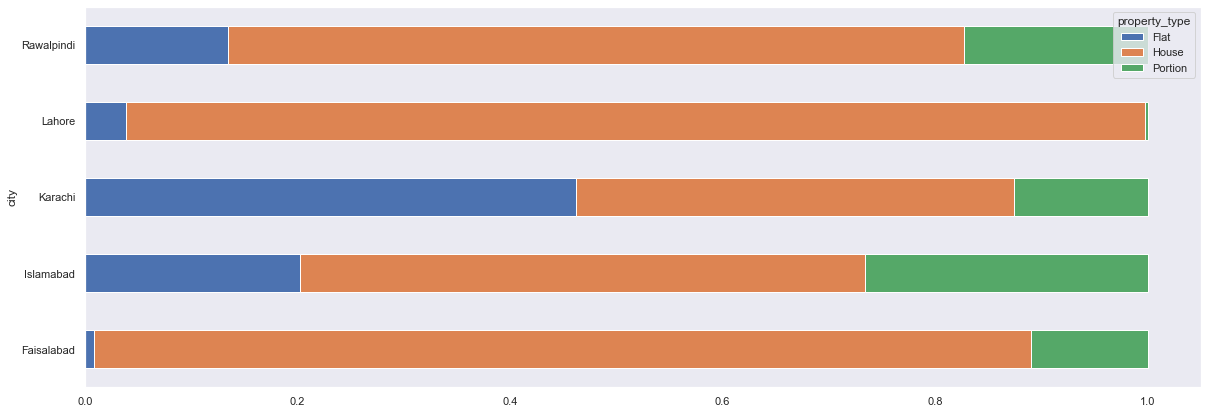

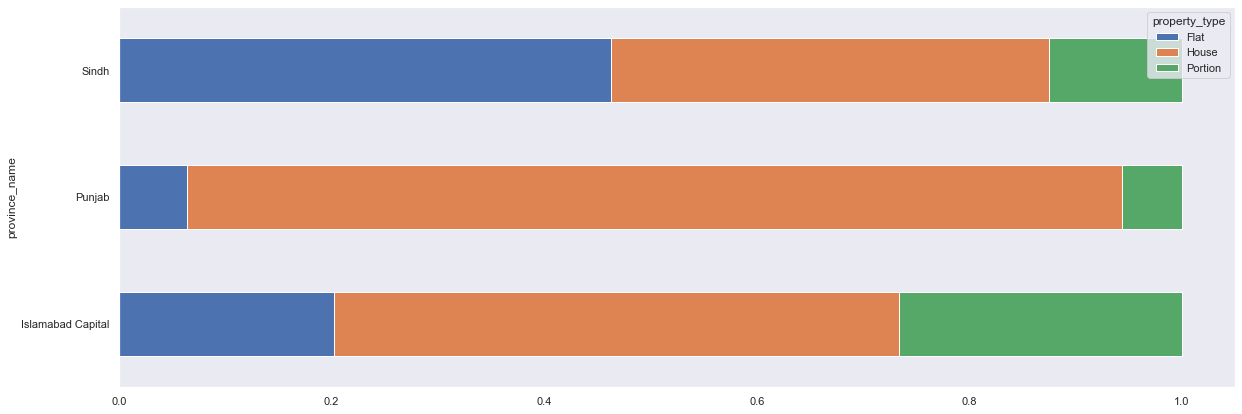

In [ ]:
df_plot = relevant_data.groupby(['property_type', 'city']).size().reset_index().pivot(columns='property_type', index='city', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = relevant_data.groupby(['property_type', 'province_name']).size().reset_index().pivot(columns='property_type', index='province_name', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()
plt.show()

### Property type for different provinces

Index(['property_type', 'province_name', 'For Rent', 'For Sale'], dtype='object', name='purpose')


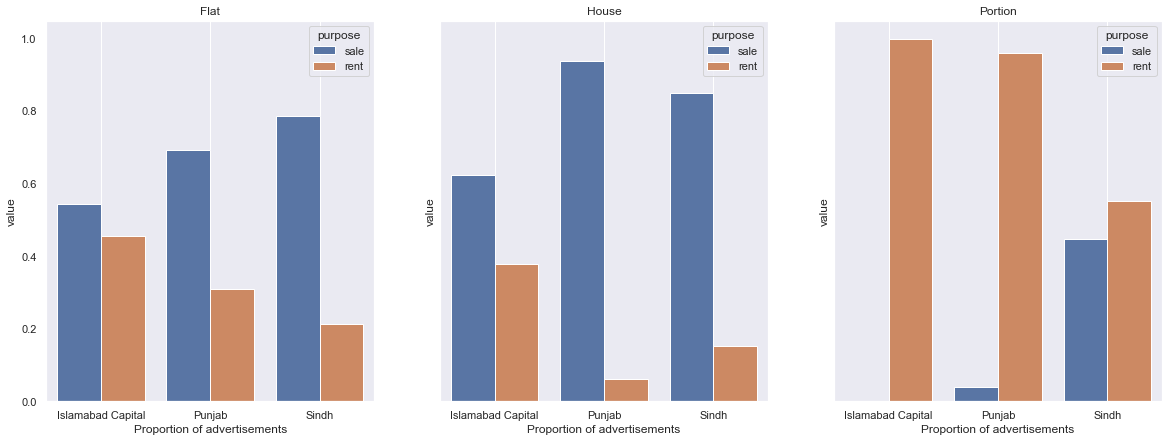

In [ ]:
df_plot = relevant_data.groupby(['property_type', 'province_name', 'purpose']).size().reset_index()

dfout = df_plot.set_index(['property_type','province_name','purpose']).unstack()[0].reset_index()
print(dfout.columns)
dfout["sum"] = dfout.sum(axis=1)
dfout['sale'] = dfout['For Sale']/dfout['sum']
dfout['rent'] = dfout['For Rent']/dfout['sum']

df = pd.melt(dfout, id_vars=['property_type', 'province_name'], value_vars=['sale', 'rent'])

fig, ax = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (20, 7))
count = 0
for i in df_plot['property_type'].unique():
    sns.barplot(x = 'province_name', y = 'value', hue = 'purpose', data = df[df['property_type'] == i], ax = ax[count])
    ax[count].set_title(i)
    ax[count].set_xlabel("Proportion of advertisements")
    ax[count].grid()
    count += 1
    





## Q2) Analyzing the recovery period of rent with respect to the selling price of a property

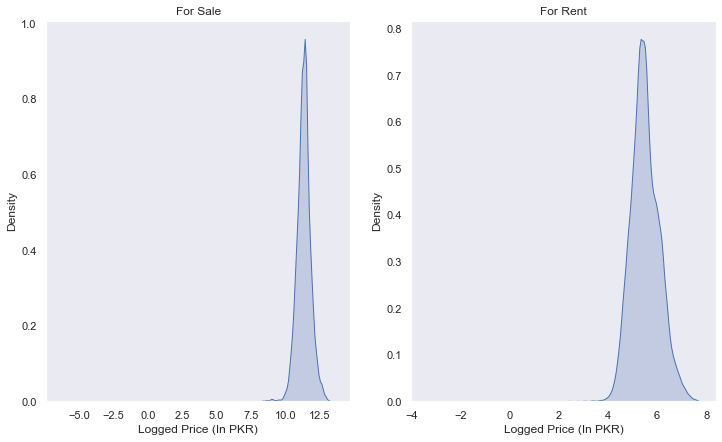

In [ ]:
# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Sale']), shade = True, ax = ax[0], label = "Sale")
sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Rent']), shade = True, ax = ax[1], label = "Rent")
ax[0].set_xlabel("Logged Price (In PKR)")
ax[0].title.set_text("For Sale")
ax[1].set_xlabel("Logged Price (In PKR)")
ax[1].title.set_text("For Rent")
ax[0].grid();ax[1].grid();
plt.show()

In [ ]:
## computing rent per area
location_sale_rent = {}
for i, row in pp_data.iterrows():
    location = row['unique_location'].strip().lower()
    price_per_area = row['price_per_area']
    purpose = row['purpose']
    if location not in location_sale_rent:
        location_sale_rent[location] = {'For Sale':[], 'For Rent':[]}
    location_sale_rent[location][purpose].append(price_per_area)

mean_loc_sale_rent = {}

#computing mean rent per area
for i in location_sale_rent:
    for_sale = location_sale_rent[i]['For Sale']
    for_rent = location_sale_rent[i]['For Rent']
    if (len(for_sale) + len(for_rent)) >= 0 and len(for_sale) > 0 and len(for_rent) > 0:
        if i not in mean_loc_sale_rent:
            mean_loc_sale_rent[i] = {'sale': 0, 'rent' : 0, 'city':''}
        mean_loc_sale_rent[i]['sale'] = np.mean(for_sale)
        mean_loc_sale_rent[i]['rent'] = np.mean(for_rent)
        mean_loc_sale_rent[i]['city'] = i.split()[-1].capitalize()
        #for a partiular location, the dictionary holds the mean rent and sale price
            
print(len(mean_loc_sale_rent))
mean_location = pd.DataFrame.from_dict(mean_loc_sale_rent, orient = 'index')
mean_location['ratio_per_month'] = np.floor(mean_location['sale'] / mean_location['rent'], dtype = 'float64')
mean_location['ratio_per_year'] = (mean_location['ratio_per_month']/12)



mean_location.head(10)    

545


,sale,rent,city,ratio_per_month,ratio_per_year
g-10 islamabad,127055.868629,276.275888,Islamabad,459.0,38.250000
e-11 islamabad,109492.071479,330.342832,Islamabad,331.0,27.583333
g-15 islamabad,72481.624132,192.703404,Islamabad,376.0,31.333333
bani gala islamabad,60754.509271,151.817360,Islamabad,400.0,33.333333
dha defence islamabad,62812.532723,158.795754,Islamabad,395.0,32.916667
ghauri town islamabad,69987.972311,169.681040,Islamabad,412.0,34.333333
korang town islamabad,64632.491484,152.521836,Islamabad,423.0,35.250000
diplomatic enclave islamabad,194558.954809,822.279687,Islamabad,236.0,19.666667
b-17 islamabad,62074.557139,181.678173,Islamabad,341.0,28.416667
g-11 islamabad,123151.002533,280.434778,Islamabad,439.0,36.583333


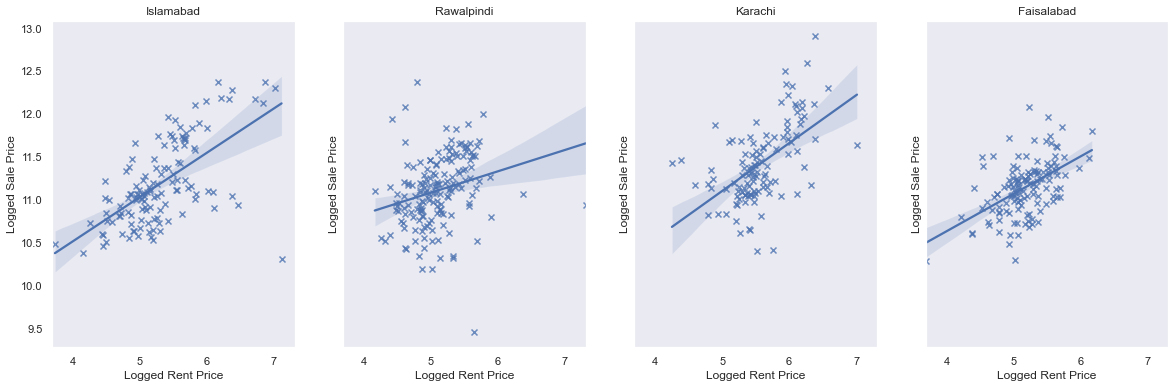

In [ ]:
mean_location['logged_sale'] = np.log(mean_location['sale'])
mean_location['logged_rent'] = np.log(mean_location['rent'])


cities = list(set(mean_location['city']))
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (20, 6))
count = 0
for i in cities:
    #sns.kdeplot(data = mean_location[['logged_rent', 'logged_sale']][mean_location['city'] == i], ax = ax[count], thresh = 0.0)
    #sns.scatterplot( x = mean_location['logged_sale'][mean_location['city'] == i], y = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count])
    sns.regplot( y = mean_location['logged_sale'][mean_location['city'] == i], x = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count], marker = 'x')
    ax[count].set_title(i)
    ax[count].set_xlabel("Logged Rent Price")
    ax[count].set_ylabel("Logged Sale Price")
    ax[count].grid()
    count += 1
plt.show()
    

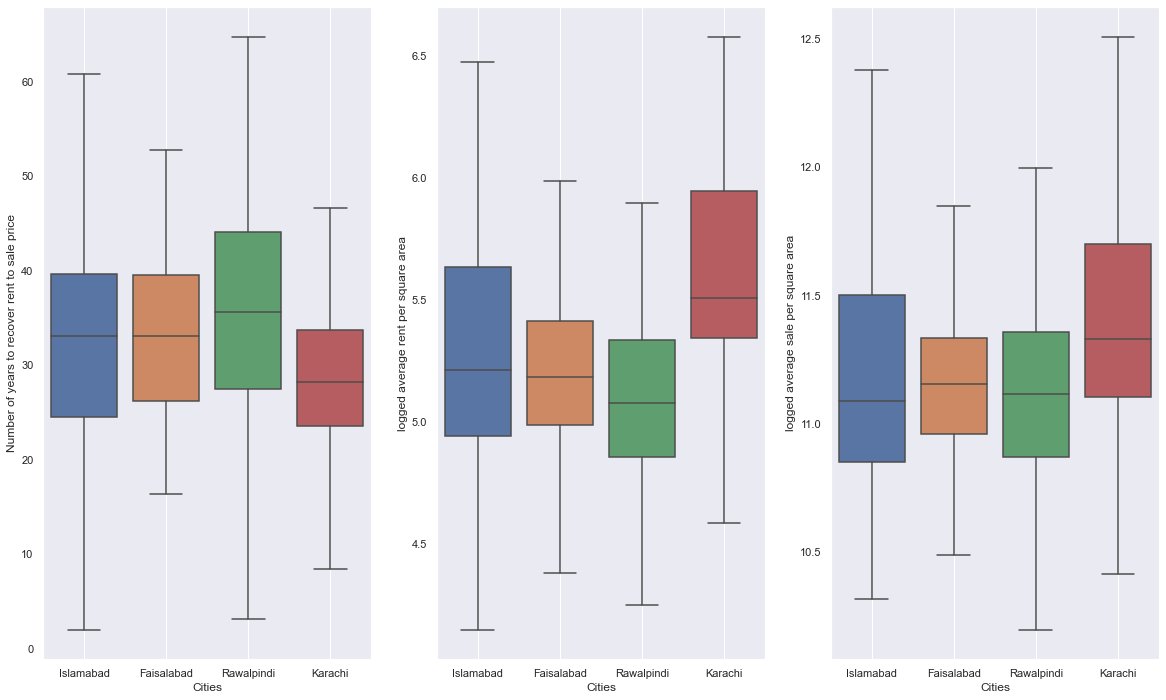

In [ ]:
mean_location = mean_location.drop(mean_location[(mean_location['ratio_per_year'] < 2) | (mean_location['ratio_per_year'] > 80)].index)


fig, ax = plt.subplots(1, 3,figsize = (20, 12))
sns.boxplot(y = 'ratio_per_year', x = 'city', data = mean_location, showfliers=False, ax = ax[0])
ax[0].set_xlabel('Cities')
ax[0].set_ylabel("Number of years to recover rent to sale price")
ax[0].grid()

sns.boxplot(y = np.log(mean_location['rent']), x = mean_location['city'], showfliers=False, ax = ax[1])
ax[1].set_xlabel('Cities')
ax[1].set_ylabel("logged average rent per square area")
ax[1].grid()

sns.boxplot(y = np.log(mean_location['sale']), x = mean_location['city'], showfliers=False, ax = ax[2])
ax[2].set_xlabel('Cities')
ax[2].set_ylabel("logged average sale per square area")
ax[2].grid()

plt.show()

### Q3) The factor on which price depends the most

In [ ]:
relevant_data = pp_data[['price', 'price_per_area', 'unique_location', 'city', 'area', 'bedrooms', 'purpose', 'property_type']].copy()
sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

<ipython-input-58-9e2ee7d71ea3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

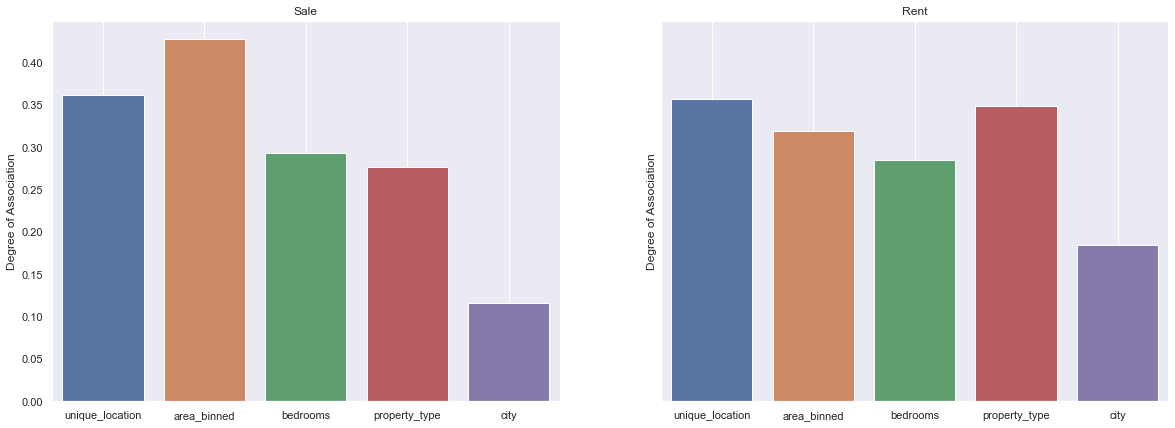

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
import scipy.stats as ss

#going with standard because we have massive outliears :(
min_max_scaler = preprocessing.StandardScaler()

sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))


sale['price_per_area'] = min_max_scaler.fit_transform(np.reshape(sale['price_per_area'].values, (-1, 1)))
rent['price_per_area'] = min_max_scaler.fit_transform(np.reshape(rent['price_per_area'].values, (-1, 1)))

sale['area'] = min_max_scaler.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
rent['area'] = min_max_scaler.fit_transform(np.reshape(rent['area'].values, (-1, 1)))

                     
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
sale['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
sale['area_binned'] = binned

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
rent['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['area'].values, (-1, 1)))
rent['area_binned'] = binned


#FTW https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

dfs = [sale, rent]
labels = ['Sale', 'Rent']
columns = ['unique_location', 'area_binned', 'bedrooms', 'property_type', 'city']


fig, ax = plt.subplots(1, 2, sharey = True, figsize = (20, 7))

for i in range(2):
    scores = []
    a = dfs[i]['price_binned']
    label = labels[i]
    for b in columns:
        b = dfs[i][b]
        scores.append(cramers_v(pd.crosstab(a, b).values))
        
    sns.barplot(x = columns, y = scores, ax = ax[i])
    ax[i].grid()
    ax[i].set_title(label)
    ax[i].set_ylabel("Degree of Association") 

### Q4) Difference between price across cities

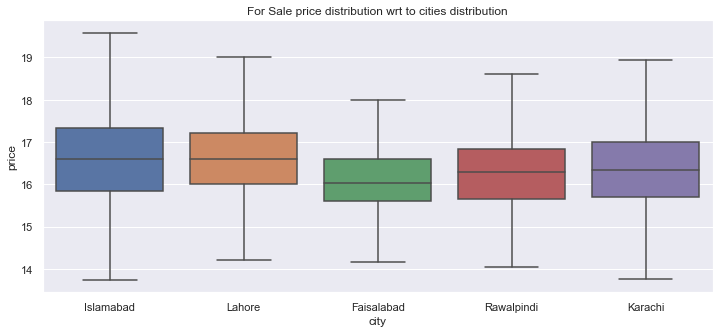

In [ ]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=for_sale.city,y=np.log(for_sale.price),ax=ax,showfliers=False).set_title('For Sale price distribution wrt to cities distribution')
plt.show()

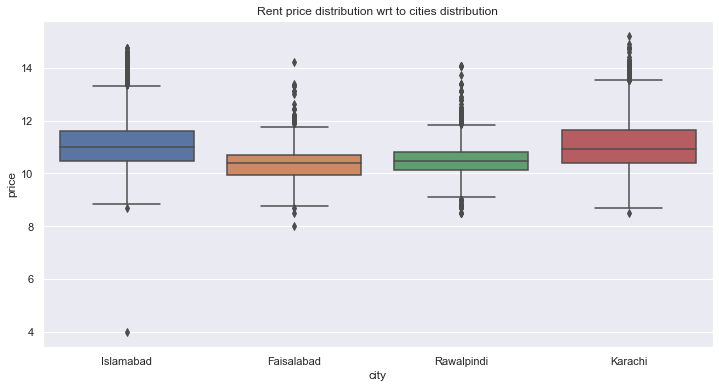

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=for_rent.city,y=np.log(for_rent.price),ax=ax).set_title('Rent price distribution wrt to cities distribution')
plt.show()

## Q5 Trend for property type changing with time

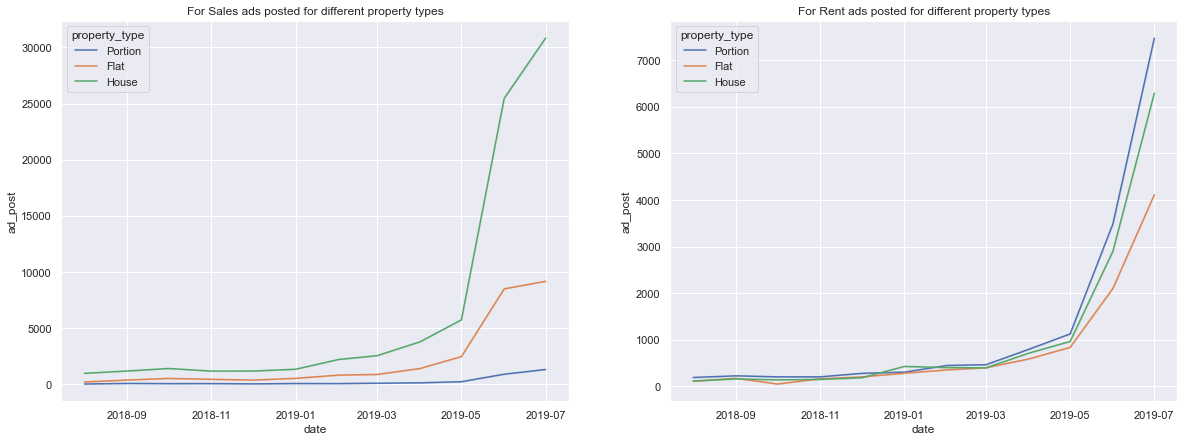

In [ ]:
pp_data['date_added'] = pd.to_datetime(pp_data['date_added'])


relevant_data = pp_data[['price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)

sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

hue_order = list(set(pp_data['property_type']))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.lineplot(x = 'date', y = 'ad_post', data = sale, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[0]).set_title('For Sales ads posted for different property types')
plt.grid()

sns.lineplot(x = 'date', y = 'ad_post', data = rent, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[1]).set_title('For Rent ads posted for different property types')
plt.grid()
plt.show()

##THIS MAKES US REALIZE THAT OUR ANALYSIS GOING FORWARD SHOULD BE TIME INDEPENDENT

types = list(set(relevant_data['property_type']))

sales_property_ratio = {}

for i, row in sale.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in sales_property_ratio:
        sales_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        sales_property_ratio[date][ptype] += 1
    else:
        sales_property_ratio[date]["Other"] += 1
    
    
for i in sales_property_ratio:
    total = sum(list(sales_property_ratio[i].values()))
    for j in types:
        sales_property_ratio[i][j] /= total

    
rent_property_ratio = {}

for i, row in rent.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in rent_property_ratio:
        rent_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        rent_property_ratio[date][ptype] += 1
    else:
        rent_property_ratio[date]["Other"] += 1
    
    
for i in rent_property_ratio:
    total = sum(list(rent_property_ratio[i].values()))
    for j in types:
        rent_property_ratio[i][j] /= total
    
        


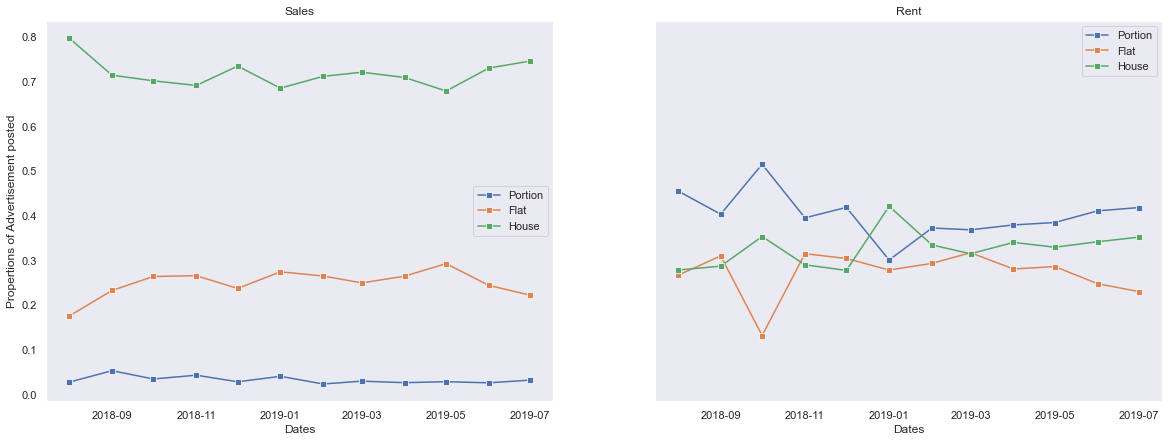

In [ ]:
sales_property = pd.DataFrame.from_dict(sales_property_ratio, orient = 'index')
rents_property = pd.DataFrame.from_dict(rent_property_ratio, orient = 'index')
dfs = [(sales_property, "Sales"), (rents_property, "Rent")]
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 7))

for i in range(2):
    data = dfs[i][0]
    for ptype in types:
        if ptype == "Other":
            continue
        sns.lineplot(x = data.index, y = (data[ptype]), label = ptype, ax = ax[i], marker = 's')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(dfs[i][1])
    ax[i].set_xlabel("Dates")
    ax[i].set_ylabel("Propertions of Advertisement posted")
plt.show()

# Data Clustering

In [32]:
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

In [33]:
data = data.drop(data[(data['property_type'] == "Room") | (data['property_type'] == "Penthouse") |  (data['property_type'] == "Farm House")].index)
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
print('numerical: ',numer)
print('categorical: ',categ)

numerical:  {'longitude', 'price_per_area', 'price_z_score', 'price', 'bedrooms', 'baths', 'latitude', 'area'}
categorical:  ['city', 'agency', 'unique_location', 'purpose', 'date_added', 'property_type', 'province_name', 'location']


In [35]:
#log tranforming data
data_log = data.copy()
data_log = data_log [(data_log  != 0).all(1)] #removing 0 rows entry for log tranformation

for i in numer:
    data_log[i] = np.log(data_log[i])

print('unique cities are: ', data.city.unique())
data_isl = data_log[data_log['city'] == "Islamabad"]
data_lhr = data_log[data_log['city'] == "Lahore"]
data_fsl = data_log[data_log['city'] == "Faisalabad"]
data_rwl = data_log[data_log['city'] == "Rawalpindi"]
data_khi = data_log[data_log['city'] == "Karachi"]

unique cities are:  ['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
#since dataset is too large, we filter rows by group by on unique location.
data_group = data.groupby('unique_location').mean()
data_log_group = data_log.groupby('unique_location').mean()

##For Sale

In [70]:
sale_data = pp_data[pp_data['purpose'] == "For Sale"]
sale_log_data = data_log[data_log['purpose'] == "For Sale"]

sale_group_data = sale_data.groupby('unique_location').mean()
sale_log_group_data = sale_log_data.groupby('unique_location').mean()

sale_isl_log = sale_log_data[sale_log_data['city'] == "Islamabad"]
sale_lhr_log = sale_log_data[sale_log_data['city'] == "Lahore"]
sale_fsl_log = sale_log_data[sale_log_data['city'] == "Faisalabad"]
sale_rwl_log = sale_log_data[sale_log_data['city'] == "Rawalpindi"]
sale_khi_log = sale_log_data[sale_log_data['city'] == "Karachi"]

###k-means clustering:

distance of each model from its centroid:  448.1625155032708


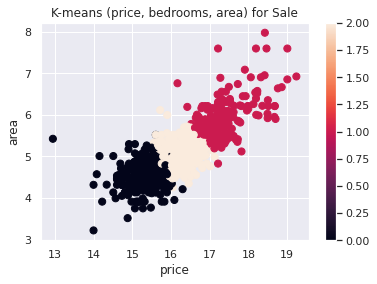

In [74]:
# ss = StandardScaler()
# X = ss.fit_transform(input_data)
n_clusters =3
input_data = sale_log_group_data[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("K-means (price, bedrooms, area) for Sale")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

sale_log_group_data['kmeans'] = y_pred

In [78]:
print('cluster 1')
print(sale_log_group_data[sale_log_group_data['kmeans'] == 0].describe())
print('cluster 2')
print(sale_log_group_data[sale_log_group_data['kmeans'] == 1].describe())
print('cluster 3')
print(sale_log_group_data[sale_log_group_data['kmeans'] == 2].describe())

cluster 1
            price    latitude   longitude  ...  price_z_score  kmeans all  kmeans
count  576.000000  576.000000  576.000000  ...     200.000000       576.0   576.0
mean    15.443829    3.437535    4.287588  ...      -2.935460         0.0     0.0
std      0.349675    0.088630    0.031873  ...       1.221701         0.0     0.0
min     12.946564    3.211683    4.204220  ...      -6.241669         0.0     0.0
25%     15.267482    3.446930    4.291046  ...      -3.454204         0.0     0.0
50%     15.503450    3.450023    4.292304  ...      -2.852998         0.0     0.0
75%     15.692816    3.512133    4.308063  ...      -2.135743         0.0     0.0
max     16.300417    3.520573    4.310771  ...       0.596440         0.0     0.0

[8 rows x 10 columns]
cluster 2
            price    latitude   longitude  ...  price_z_score  kmeans all  kmeans
count  223.000000  223.000000  223.000000  ...     163.000000       223.0   223.0
mean    17.318703    3.427584    4.283098  ...      -2.

distance of each model from its centroid:  58.76909285137914


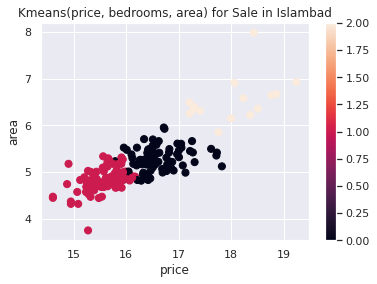

In [60]:
n_clusters =3
input_data = sale_isl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Sale in Islambad")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  168.9103046381676


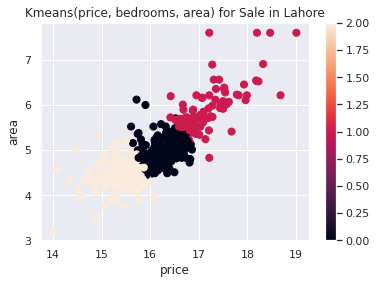

In [61]:
n_clusters =3
input_data = sale_lhr_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Sale in Lahore")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  63.006778655570606


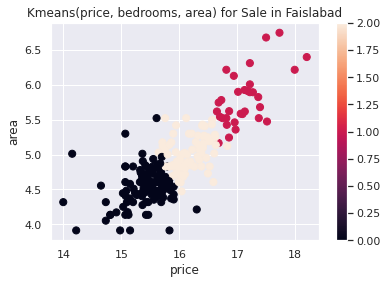

In [64]:
n_clusters =3
input_data = sale_fsl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Sale in Faislabad")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  69.7282401687269


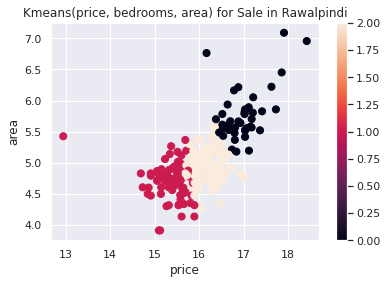

In [65]:
n_clusters =3
input_data = sale_rwl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Sale in Rawalpindi")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  49.124543454998545


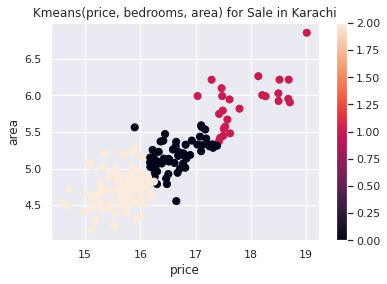

In [73]:
sale_log_group_data_khi = sale_khi_log.groupby('unique_location').mean()

n_clusters =3
input_data = sale_log_group_data_khi[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Sale in Karachi")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

sale_log_group_data_khi['kmeans'] =y_pred

In [79]:
print('cluster 1')
print(sale_log_group_data_khi[sale_log_group_data_khi['kmeans'] == 0].describe())
print('cluster 2')
print(sale_log_group_data_khi[sale_log_group_data_khi['kmeans'] == 1].describe())
print('cluster 3')
print(sale_log_group_data_khi[sale_log_group_data_khi['kmeans'] == 2].describe())

cluster 1
           price   latitude  longitude  ...  price_per_area  price_z_score  kmeans
count  57.000000  57.000000  57.000000  ...       57.000000      50.000000    57.0
mean   16.648057   3.214392   4.206061  ...       11.468767      -2.154103     0.0
std     0.364211   0.001898   0.001259  ...        0.332239       0.917003     0.0
min    15.896170   3.210544   4.202332  ...       10.333405      -5.508650     0.0
25%    16.331464   3.213221   4.205285  ...       11.281826      -2.744783     0.0
50%    16.638298   3.214034   4.205723  ...       11.507676      -1.969666     0.0
75%    16.900104   3.215330   4.206747  ...       11.700606      -1.603667     0.0
max    17.384960   3.219685   4.211116  ...       12.094847      -0.208054     0.0

[8 rows x 9 columns]
cluster 2
           price   latitude  longitude  ...  price_per_area  price_z_score  kmeans
count  25.000000  25.000000  25.000000  ...       25.000000      23.000000    25.0
mean   17.894592   3.213700   4.205996  ...  

###Hierarchical clustering using dendrograms

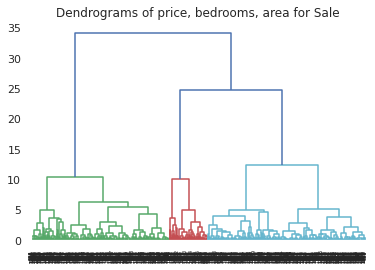

In [105]:
input_data = sale_log_group_data[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms of price, bedrooms, area for Sale")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

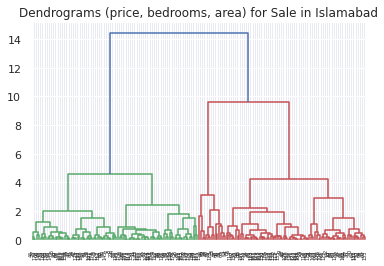

In [103]:
input_data = sale_isl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Sale in Islamabad")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

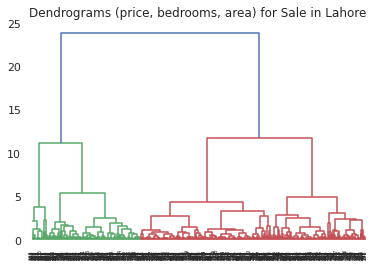

In [106]:
input_data = sale_lhr_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Sale in Lahore")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

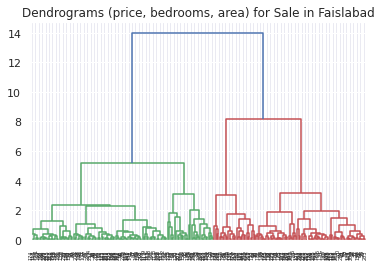

In [107]:
input_data = sale_fsl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Sale in Faislabad")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

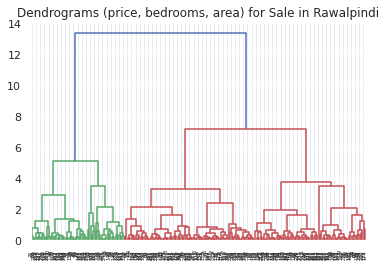

In [108]:
input_data = sale_rwl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Sale in Rawalpindi")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

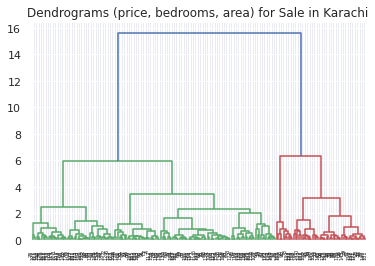

In [109]:
input_data = sale_khi_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Sale in Karachi")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

###Density-based spatial clustering of applications with noise (DBSCAN)

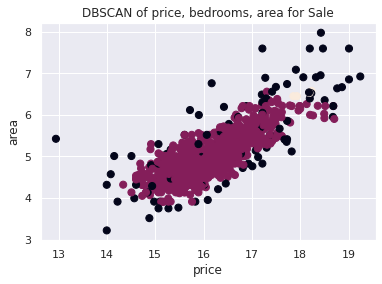

In [119]:
input_data = sale_log_group_data[['price','area','bedrooms']]

ss = StandardScaler()
X = ss.fit_transform(input_data)
db = DBSCAN(eps=.5, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
plt.xlabel('price')
plt.ylabel('area')
plt.title("DBSCAN of price, bedrooms, area for Sale") 

sale_log_group_data['dbscan'] = y_pred

In [126]:
np.unique(sale_log_group_data['dbscan'])

array([-1,  0,  1,  2])

In [128]:
print('cluster 1')
print(sale_log_group_data[sale_log_group_data['dbscan'] == -1].describe())
print('cluster 2')
print(sale_log_group_data[sale_log_group_data['dbscan'] == 0].describe())
print('cluster 3')
print(sale_log_group_data[sale_log_group_data['dbscan'] == 1].describe())
print('cluster 4')
print(sale_log_group_data[sale_log_group_data['dbscan'] == 2].describe())

cluster 1
            price    latitude   longitude  ...  kmeans all      kmeans  dbscan
count  102.000000  102.000000  102.000000  ...  102.000000  102.000000   102.0
mean    16.533580    3.455482    4.291006  ...    0.911765    0.911765    -1.0
std      1.374295    0.077657    0.026342  ...    0.745985    0.745985     0.0
min     12.946564    3.210514    4.204124  ...    0.000000    0.000000    -1.0
25%     15.503210    3.447451    4.291152  ...    0.000000    0.000000    -1.0
50%     16.514588    3.451838    4.292012  ...    1.000000    1.000000    -1.0
75%     17.554153    3.514660    4.307823  ...    1.000000    1.000000    -1.0
max     19.241706    3.520573    4.310398  ...    2.000000    2.000000    -1.0

[8 rows x 11 columns]
cluster 2
             price     latitude    longitude  ...   kmeans all       kmeans  dbscan
count  1345.000000  1345.000000  1345.000000  ...  1345.000000  1345.000000  1345.0
mean     16.051053     3.436223     4.286533  ...     1.065428     1.065428   

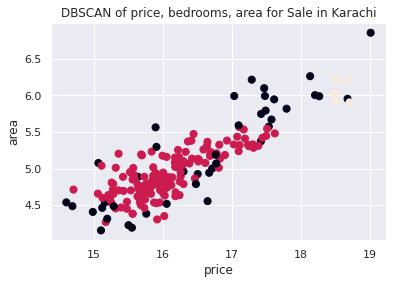

In [140]:
input_data = sale_log_group_data_khi[['price','area','bedrooms']]

ss = StandardScaler()
X = ss.fit_transform(input_data)
db = DBSCAN(eps=.5, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
plt.xlabel('price')
plt.ylabel('area')
plt.title("DBSCAN of price, bedrooms, area for Sale in Karachi") 
sale_log_group_data_khi['dbscan'] =y_pred

In [129]:
np.unique(sale_log_group_data_khi['dbscan'])

array([-1,  0,  1])

In [130]:
print('cluster 1')
print(sale_log_group_data_khi[sale_log_group_data_khi['dbscan'] == -1].describe())
print('cluster 2')
print(sale_log_group_data_khi[sale_log_group_data_khi['dbscan'] == 0].describe())
print('cluster 3')
print(sale_log_group_data_khi[sale_log_group_data_khi['dbscan'] == 1].describe())

cluster 1
           price   latitude  longitude  ...  price_z_score     kmeans  dbscan
count  41.000000  41.000000  41.000000  ...      28.000000  41.000000    41.0
mean   16.583150   3.214840   4.206079  ...      -1.551506   1.121951    -1.0
std     1.169743   0.002881   0.002166  ...       1.093900   0.780869     0.0
min    14.604067   3.210514   4.202332  ...      -4.453755   0.000000    -1.0
25%    15.553822   3.213413   4.205159  ...      -2.155330   1.000000    -1.0
50%    16.671938   3.214093   4.205647  ...      -1.321208   1.000000    -1.0
75%    17.479072   3.216246   4.206849  ...      -0.738835   2.000000    -1.0
max    19.008467   3.225195   4.216540  ...       0.071834   2.000000    -1.0

[8 rows x 10 columns]
cluster 2
            price    latitude   longitude  ...  price_z_score      kmeans  dbscan
count  148.000000  148.000000  148.000000  ...     110.000000  148.000000   148.0
mean    16.079911    3.215355    4.206155  ...      -2.215812    1.337838     0.0
std      

## For Rent

###k-means clustering

In [92]:
rent_data = pp_data[pp_data['purpose'] == "For Rent"]
rent_log_data = data_log[data_log['purpose'] == "For Rent"]

rent_group_data = rent_data.groupby('unique_location').mean()
rent_log_group_data = rent_log_data.groupby('unique_location').mean()

rent_isl_log = rent_log_data[rent_log_data['city'] == "Islamabad"]
rent_fsl_log = rent_log_data[rent_log_data['city'] == "Faisalabad"]
rent_rwl_log = rent_log_data[rent_log_data['city'] == "Rawalpindi"]
rent_khi_log = rent_log_data[rent_log_data['city'] == "Karachi"]

distance of each model from its centroid:  205.47808040414174


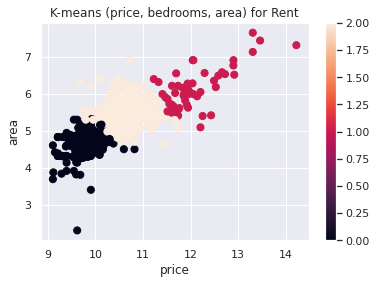

In [83]:
n_clusters =3
input_data = rent_log_group_data[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("K-means (price, bedrooms, area) for Rent")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

rent_log_group_data['kmeans'] = y_pred

In [84]:
print('cluster 1')
print(rent_log_group_data[rent_log_group_data['kmeans'] == 0].describe())
print('cluster 2')
print(rent_log_group_data[rent_log_group_data['kmeans'] == 1].describe())
print('cluster 3')
print(rent_log_group_data[rent_log_group_data['kmeans'] == 2].describe())

cluster 1
            price    latitude  ...  price_z_score  kmeans
count  242.000000  242.000000  ...      59.000000   242.0
mean     9.836549    3.442279  ...      -1.981549     0.0
std      0.308441    0.109870  ...       1.194929     0.0
min      9.104980    3.211851  ...      -4.496855     0.0
25%      9.615805    3.446717  ...      -2.812184     0.0
50%      9.879508    3.512747  ...      -1.846472     0.0
75%     10.058837    3.515157  ...      -1.241208     0.0
max     10.819778    3.519950  ...       1.059984     0.0

[8 rows x 9 columns]
cluster 2
           price   latitude  longitude  ...  price_per_area  price_z_score  kmeans
count  51.000000  51.000000  51.000000  ...       51.000000      40.000000    51.0
mean   12.100898   3.398669   4.261388  ...        5.943672      -1.043592     1.0
std     0.605861   0.140452   0.041518  ...        0.470026       0.725252     0.0
min    11.224576   3.210514   4.205113  ...        4.827646      -2.183073     1.0
25%    11.684607   3.

distance of each model from its centroid:  53.84727755700808


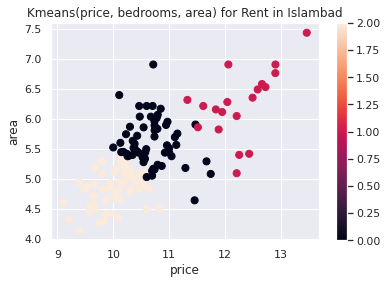

In [82]:
n_clusters =3
input_data = rent_isl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Rent in Islambad")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  50.83005421567762


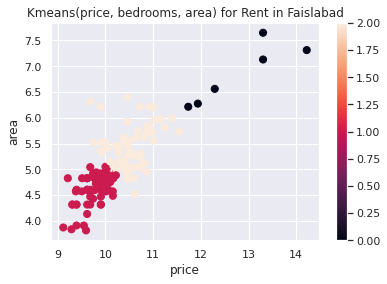

In [93]:
n_clusters =3
input_data = rent_fsl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Rent in Faislabad")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  43.633587919414325


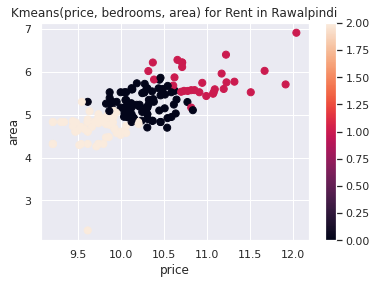

In [94]:
n_clusters =3
input_data = rent_rwl_log.groupby('unique_location').mean()[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Rent in Rawalpindi")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

distance of each model from its centroid:  27.61673194100246


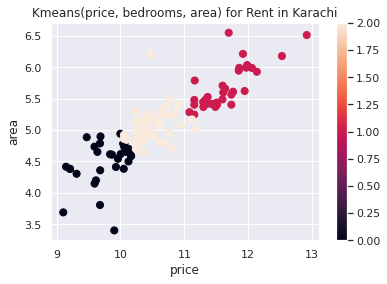

In [95]:
rent_log_group_data_khi = rent_khi_log.groupby('unique_location').mean()

n_clusters =3
input_data = rent_log_group_data_khi[['price','area','bedrooms']]

km = KMeans(n_clusters)
km.fit(input_data)
y_pred = km.predict(input_data)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
# ax.set_xlim(-3,3)
ax.set_xlabel('price')
ax.set_ylabel('area')
ax.set_title("Kmeans(price, bedrooms, area) for Rent in Karachi")
plt.colorbar(scatter)
print('distance of each model from its centroid: ',km.inertia_)

rent_log_group_data_khi['kmeans'] =y_pred

In [96]:
print('cluster 1')
print(rent_log_group_data_khi[rent_log_group_data_khi['kmeans'] == 0].describe())
print('cluster 2')
print(rent_log_group_data_khi[rent_log_group_data_khi['kmeans'] == 1].describe())
print('cluster 3')
print(rent_log_group_data_khi[rent_log_group_data_khi['kmeans'] == 2].describe())

cluster 1
           price   latitude  longitude  ...  price_per_area  price_z_score  kmeans
count  30.000000  30.000000  30.000000  ...       30.000000      12.000000    30.0
mean    9.768004   3.214964   4.206019  ...        5.284278      -2.282121     0.0
std     0.326033   0.002018   0.001462  ...        0.392232       1.500459     0.0
min     9.104980   3.211851   4.204124  ...        4.586122      -4.496855     0.0
25%     9.600722   3.213450   4.205298  ...        4.993081      -2.946370     0.0
50%     9.853070   3.215129   4.205695  ...        5.327933      -2.431071     0.0
75%    10.049883   3.216193   4.206254  ...        5.448160      -1.966971     0.0
max    10.167338   3.220600   4.211148  ...        6.502290       1.059984     0.0

[8 rows x 9 columns]
cluster 2
           price   latitude  longitude  ...  price_per_area  price_z_score  kmeans
count  33.000000  33.000000  33.000000  ...       33.000000      30.000000    33.0
mean   11.641771   3.213580   4.205871  ...  

###Hierarchical clustering using dendrograms

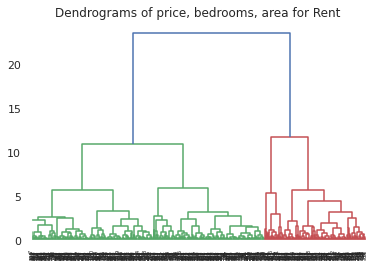

In [131]:
input_data = rent_log_group_data[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms of price, bedrooms, area for Rent")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

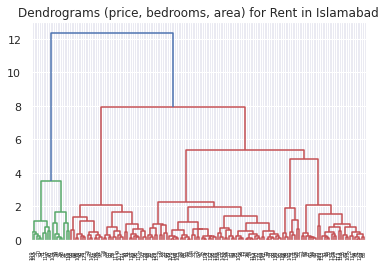

In [132]:
input_data = rent_isl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Rent in Islamabad")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

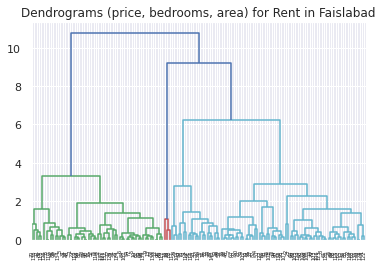

In [133]:
input_data = rent_fsl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Rent in Faislabad")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

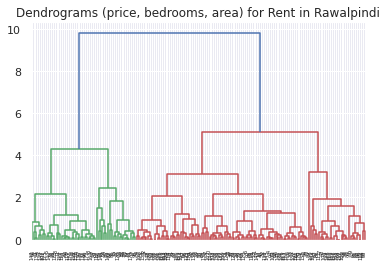

In [134]:
input_data = rent_rwl_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Rent in Rawalpindi")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

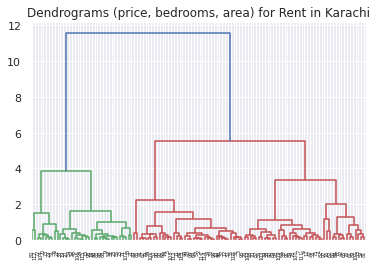

In [135]:
input_data = rent_khi_log.groupby('unique_location').mean()[['price','area','bedrooms']]
fig = plt.figure() 
plt.title("Dendrograms (price, bedrooms, area) for Rent in Karachi")  
dend = shc.dendrogram(shc.linkage(input_data, method='ward'))

###Density-based spatial clustering of applications with noise (DBSCAN)

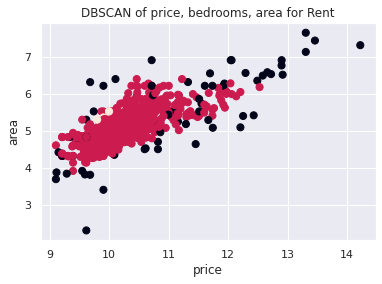

In [139]:
input_data = rent_log_group_data[['price','area','bedrooms']]

ss = StandardScaler()
X = ss.fit_transform(input_data)
db = DBSCAN(eps=.5, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
plt.xlabel('price')
plt.ylabel('area')
plt.title("DBSCAN of price, bedrooms, area for Rent") 

rent_log_group_data['dbscan'] = y_pred

In [137]:
np.unique(rent_log_group_data['dbscan'])

array([-1,  0,  1])

In [138]:
print('cluster 1')
print(rent_log_group_data[rent_log_group_data['dbscan'] == -1].describe())
print('cluster 2')
print(rent_log_group_data[rent_log_group_data['dbscan'] == 0].describe())
print('cluster 3')
print(rent_log_group_data[rent_log_group_data['dbscan'] == 1].describe())

cluster 1
           price   latitude  longitude  ...  price_per_area  price_z_score  dbscan
count  69.000000  69.000000  69.000000  ...       69.000000      34.000000    69.0
mean   11.013538   3.455875   4.280406  ...        5.562669      -0.899324    -1.0
std     1.288166   0.098925   0.029102  ...        0.836599       0.979331     0.0
min     9.104980   3.211564   4.204237  ...        3.366310      -2.772319    -1.0
25%     9.740969   3.447249   4.290282  ...        5.018509      -1.746370    -1.0
50%    10.819778   3.513521   4.291464  ...        5.654992      -0.857537    -1.0
75%    11.937581   3.516777   4.292106  ...        6.096825      -0.043518    -1.0
max    14.220976   3.520571   4.295742  ...        7.313220       1.059984    -1.0

[8 rows x 9 columns]
cluster 2
            price    latitude  ...  price_z_score  dbscan
count  504.000000  504.000000  ...     203.000000   504.0
mean    10.317803    3.434232  ...      -2.028149     0.0
std      0.578279    0.118633  ...   

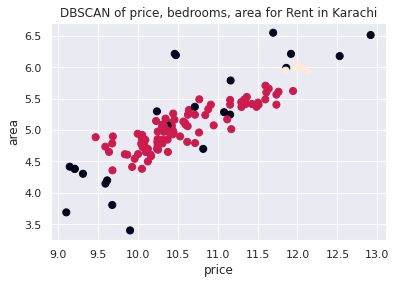

In [141]:
input_data = rent_log_group_data_khi[['price','area','bedrooms']]

ss = StandardScaler()
X = ss.fit_transform(input_data)
db = DBSCAN(eps=.5, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(input_data['price'], input_data['area'],c=y_pred, s=50)
plt.xlabel('price')
plt.ylabel('area')
plt.title("DBSCAN of price, bedrooms, area for Rent in Karachi") 
rent_log_group_data_khi['dbscan'] =y_pred

In [142]:
np.unique(rent_log_group_data_khi['dbscan'])

array([-1,  0,  1])

In [143]:
print('cluster 1')
print(rent_log_group_data_khi[rent_log_group_data_khi['dbscan'] == -1].describe())
print('cluster 2')
print(rent_log_group_data_khi[rent_log_group_data_khi['dbscan'] == 0].describe())
print('cluster 3')
print(rent_log_group_data_khi[rent_log_group_data_khi['dbscan'] == 1].describe())

cluster 1
           price   latitude  longitude  ...  price_z_score     kmeans  dbscan
count  23.000000  23.000000  23.000000  ...      11.000000  23.000000    23.0
mean   10.529926   3.214984   4.205957  ...      -1.126906   0.869565    -1.0
std     1.123981   0.002725   0.001449  ...       1.168794   0.814881     0.0
min     9.104980   3.211564   4.203388  ...      -2.494871   0.000000    -1.0
25%     9.606049   3.213240   4.205165  ...      -2.108201   0.000000    -1.0
50%    10.463103   3.214880   4.205381  ...      -1.338520   1.000000    -1.0
75%    11.159526   3.215731   4.206821  ...      -0.325994   1.500000    -1.0
max    12.916226   3.223168   4.209651  ...       1.059984   2.000000    -1.0

[8 rows x 10 columns]
cluster 2
           price   latitude  longitude  ...  price_z_score     kmeans  dbscan
count  90.000000  90.000000  90.000000  ...      60.000000  90.000000    90.0
mean   10.570933   3.214689   4.206148  ...      -2.006704   1.311111     0.0
std     0.594774   0.